In [299]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
import xgboost
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from sklearn.metrics import accuracy_score

In [300]:
x = np.load('X.npy')
Y = np.load('Y.npy')

x.shape

(2062, 64, 64)

In [301]:
#### Initialization Procedurale ####
cra = np.random.choice(2062, size=9)

x = x[cra]

print(cra)

colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn',
          'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r',
          'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r',
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
          'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 
          'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 
          'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 
          'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
          'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 
          'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
          'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
          'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 
          'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 
          'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r',
          'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
          'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r',
          'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

[1490 1070 1141 1530  890 1350   44 1866  948]


In [302]:
nine = x[0:9]
nine.shape

(9, 64, 64)

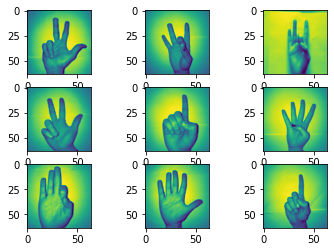

In [303]:
i=1
for image in nine :
    plt.subplot(3,3, i)
    plt.imshow(image)
    i+=1
    if i > 9 :
        break

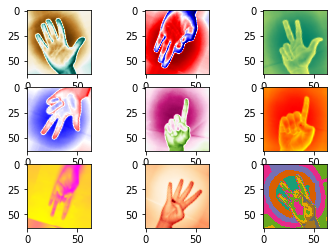

In [304]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg

# cross_entropy= -tensorflow.reduce_sum(tensorflow.cast(nine[1],tensorflow.float32)*tensorflow.log(y_conv))

nine2 = nine.reshape(9,64,64,1)
                   
datagen = idg(featurewise_center=True,samplewise_center=True, featurewise_std_normalization=True, 
             samplewise_std_normalization=True, zca_whitening=True, zca_epsilon=1e-06,
             rotation_range=30, width_shift_range=0.0, height_shift_range=0.0,
             brightness_range=None,  shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, 
             fill_mode='nearest',cval=0.0,  horizontal_flip=False,vertical_flip=True,rescale=None, 
             preprocessing_function=None, data_format='channels_last', validation_split=0.0)

# datagen.fit(nine2) # pour bien prendre en compte les blanchissements par ex, revient a standardisé les images
nine3 = datagen.flow(nine2,batch_size=9)[0]
nine4 = nine3.reshape(9,64,64)
i=1
for image in nine4 :
    choiceColor = colors[np.random.choice(172)]
    plt.subplot(3,3, i)
    plt.imshow(image,cmap=f'{choiceColor}')
    i+=1
    if i > 9 :
        break